<a href="https://colab.research.google.com/github/khuongduying/biostat/blob/main/DDS_discr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(devtools)
library(ggplot2)

Loading required package: usethis



In [ ]:
suppressMessages(devtools::install_github("OI-Biostat/oi_biostat_data"))


highr        (0.9   -> 0.10 ) [CRAN]
xfun         (0.41  -> 0.42 ) [CRAN]
bit          (4.0.4 -> 4.0.5) [CRAN]
isoband      (0.2.6 -> 0.2.7) [CRAN]
ggplot2      (3.4.4 -> 3.5.0) [CRAN]
usdata       (NA    -> 0.2.0) [CRAN]
cherryblo... (NA    -> 0.1.0) [CRAN]
airports     (NA    -> 0.1.0) [CRAN]
NHANES       (NA    -> 2.1.0) [CRAN]
openintro    (NA    -> 2.4.0) [CRAN]
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmphB7TFV/remotes14a4a8a5eea/OI-Biostat-oi_biostat_data-9ee2cbc/DESCRIPTION’ ... OK
* preparing ‘oibiostat’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
  NB: this package now depends on R (>= 3.5.0)
  serialize/load version 3 cannot be read in older versions of R.
  File(s) containing such objects:
    ‘oibiostat/data/swim.rda’
* building

In [ ]:
library(oibiostat)

In [ ]:
data(dds.discr)

In [ ]:
head(dds.discr)

id,age.cohort,age,gender,expenditures,ethnicity
<int>,<fct>,<int>,<fct>,<int>,<fct>
10210,13-17,17,Female,2113,White not Hispanic
10409,22-50,37,Male,41924,White not Hispanic
10486,0-5,3,Male,1454,Hispanic
10538,18-21,19,Female,6400,Hispanic
10568,13-17,13,Male,4412,White not Hispanic
10690,13-17,15,Female,4566,Hispanic


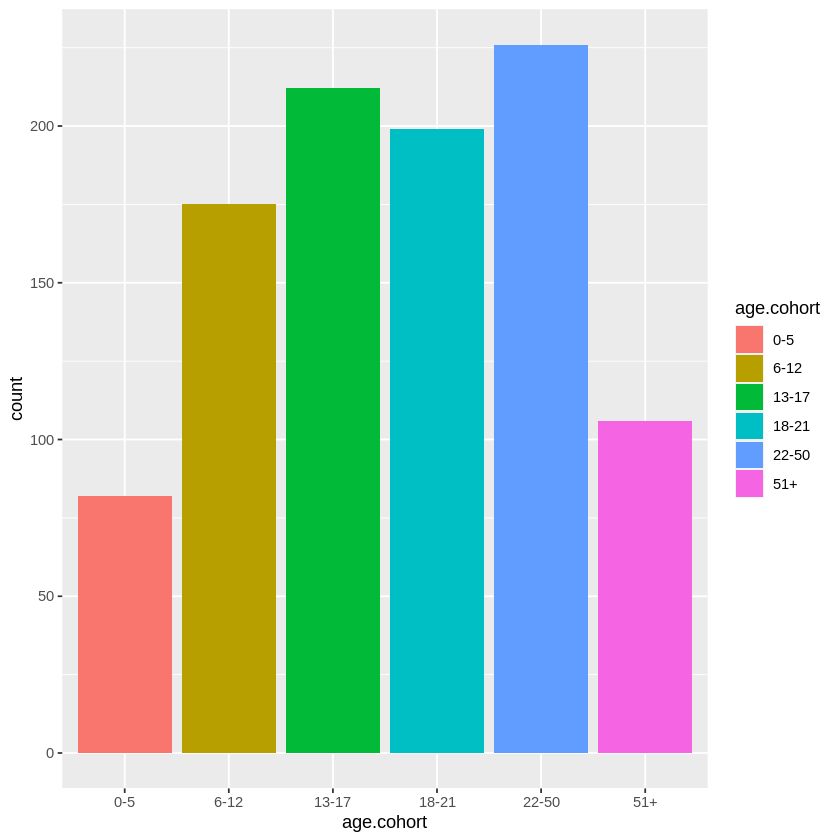

In [ ]:
## number of age groups
ggplot(
    dds.discr,
    aes(x=age.cohort)
) +
geom_bar(aes(fill=age.cohort))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


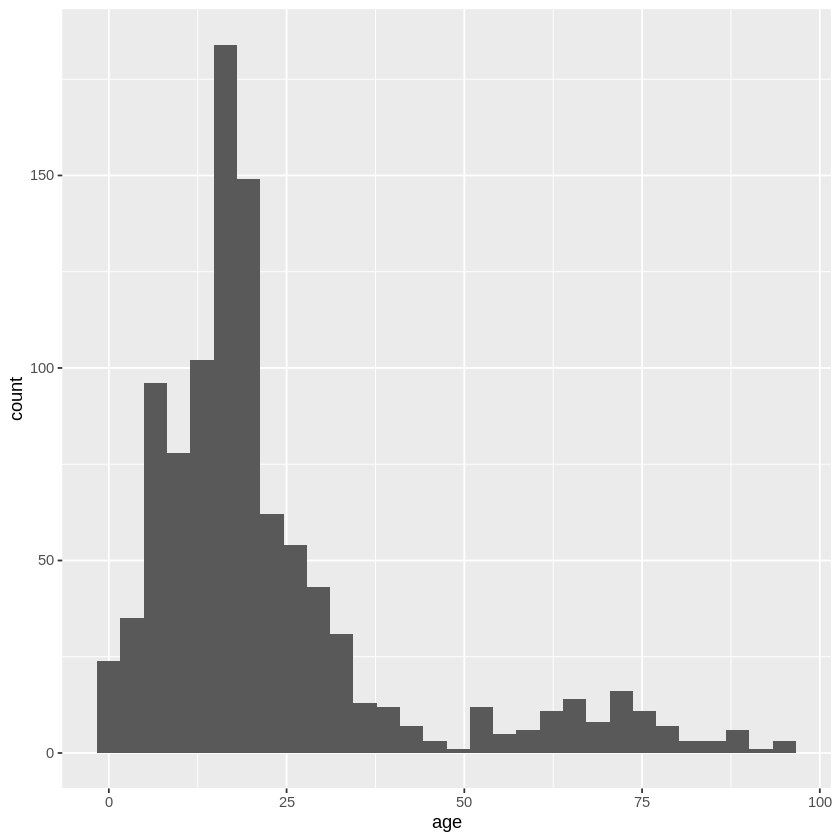

In [ ]:
## Distribution of ages
ggplot(
    dds.discr,
    aes(x=age)
)+
  geom_histogram() #### Skewed right

Q1: Is there any differences between expenditures among ethnic groups?

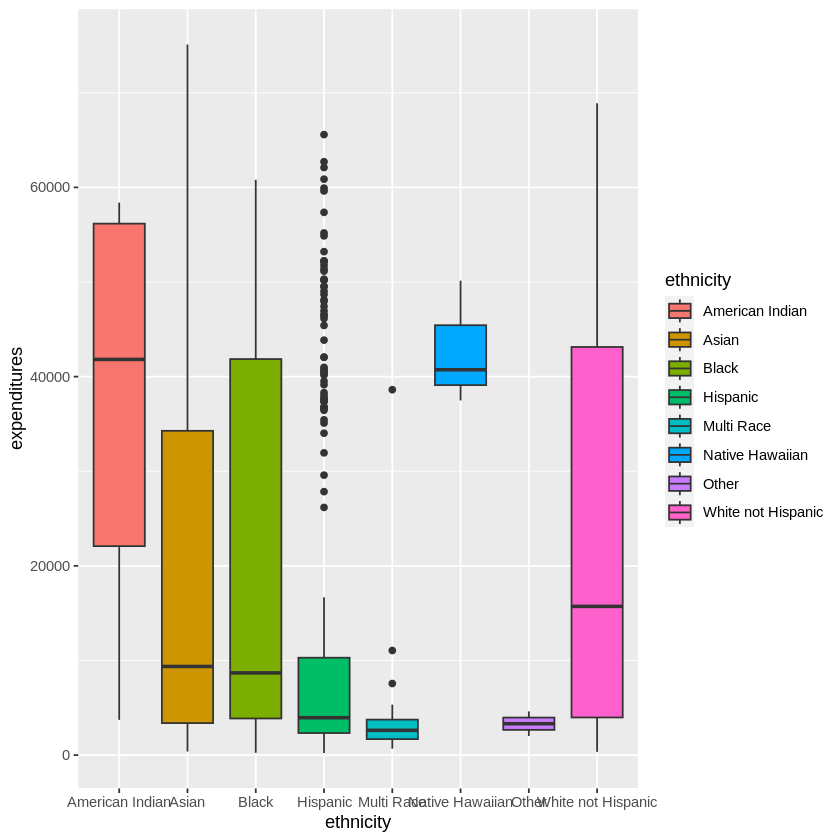

In [ ]:
ggplot(
  dds.discr,
  aes(x=ethnicity, y=expenditures)
) + geom_boxplot(aes(fill=ethnicity))

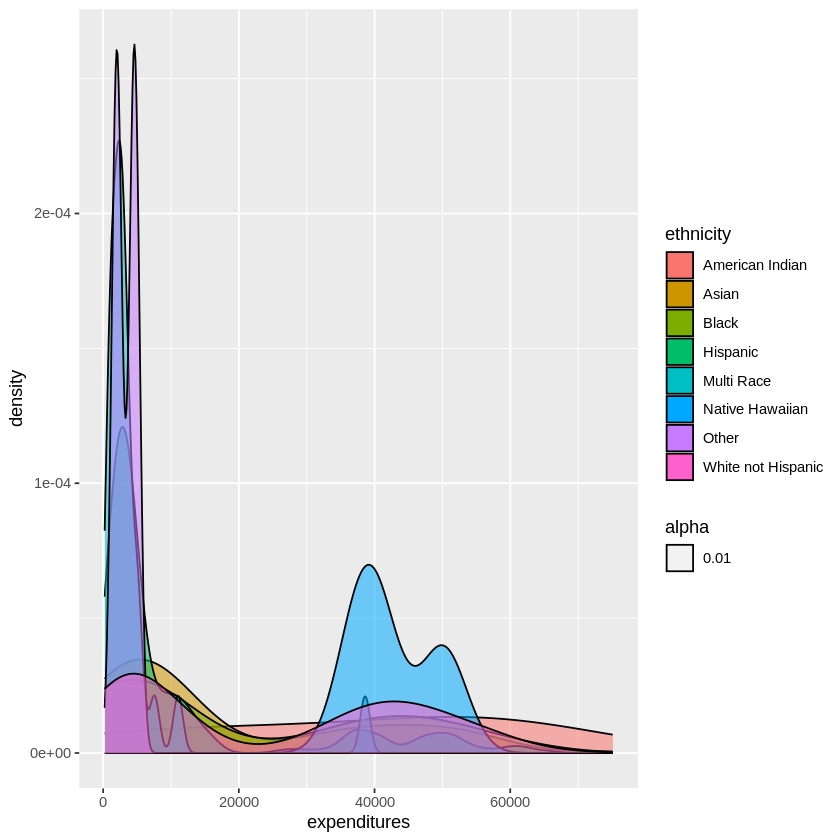

In [ ]:
ggplot(
  dds.discr,
  aes(x=expenditures)
) + geom_density(aes(fill=ethnicity, alpha=0.01))

Q2: Is there any differences in expenditures between gender?

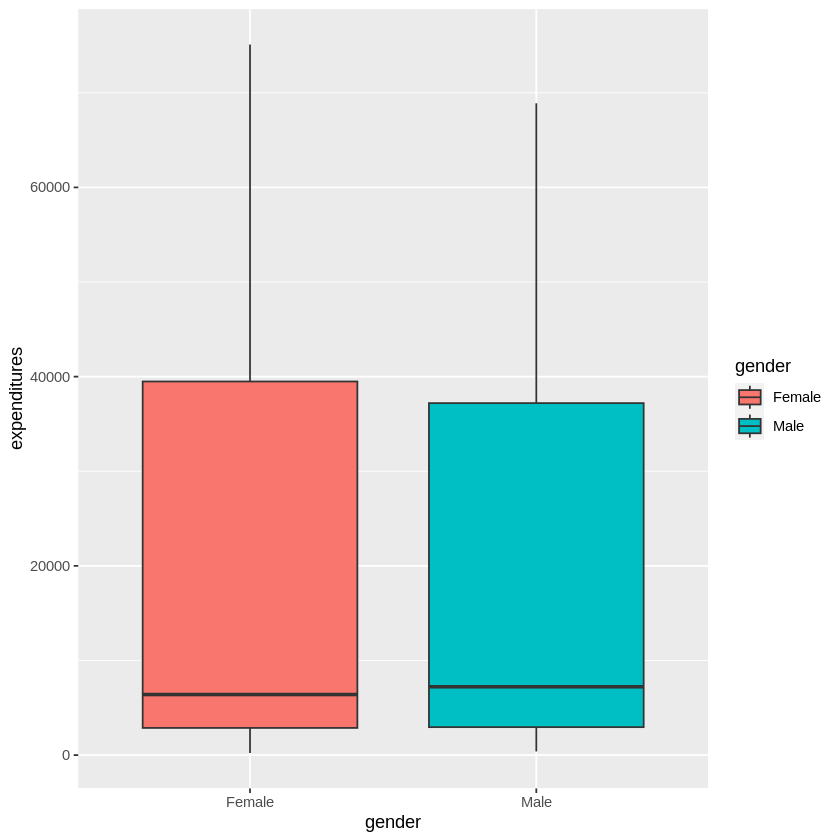

In [ ]:
ggplot(
  dds.discr,
  aes(x=gender, y=expenditures)
) +
  geom_boxplot(aes(fill=gender))

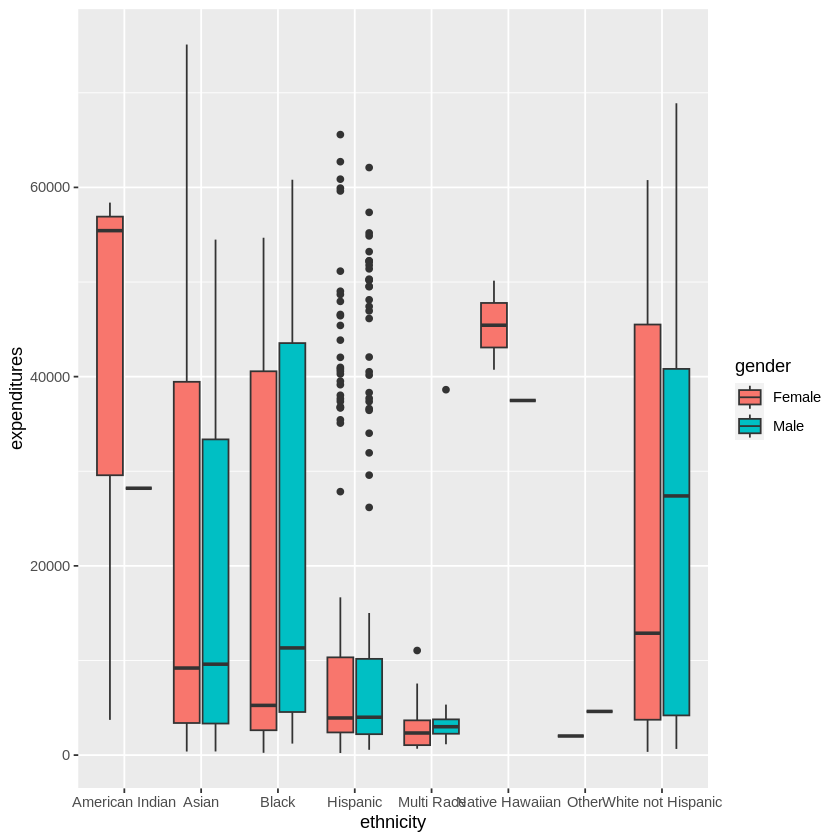

In [ ]:
ggplot(
  dds.discr,
  aes(x=ethnicity, y=expenditures)
) +
  geom_boxplot(aes(fill=gender))

What's wrong with the expenditures between gender of American Indian and Hawaian ethnic?

Q3: Which age.cohort have the most expenditures?

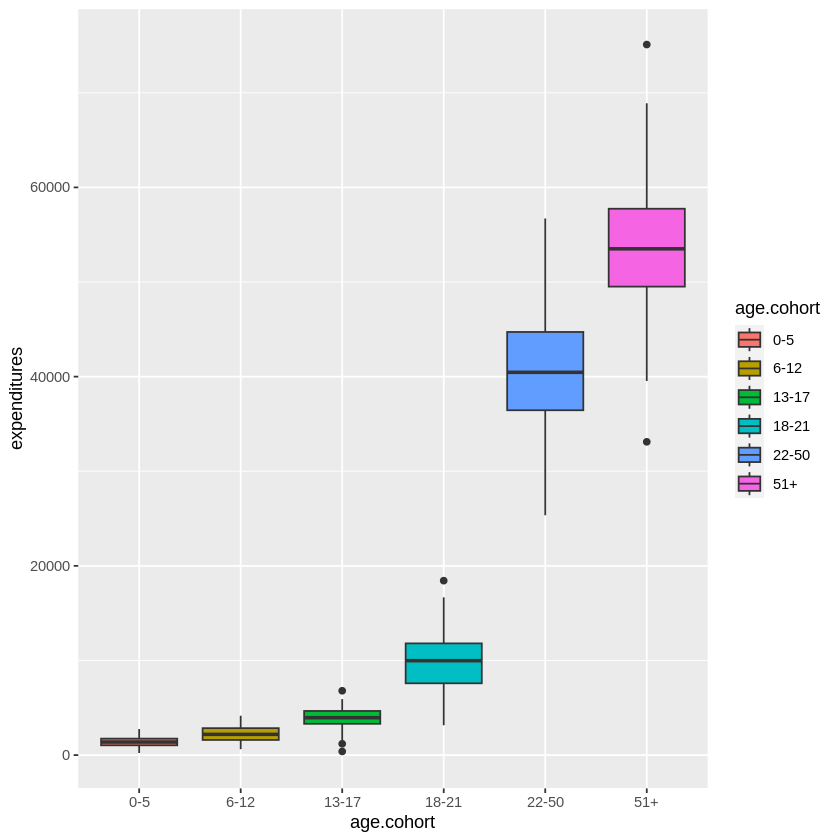

In [ ]:
ggplot(
  dds.discr,
  aes(x=age.cohort, y=expenditures)
) +
  geom_boxplot(aes(fill=age.cohort))

## Comparing between two largest groups

#### Filter

In [ ]:
# Filter ethnicity that matched "Hipanic" and "White not Hispanic"
his_white <- dds.discr[dds.discr$ethnicity==c("Hispanic","White not Hispanic"),]

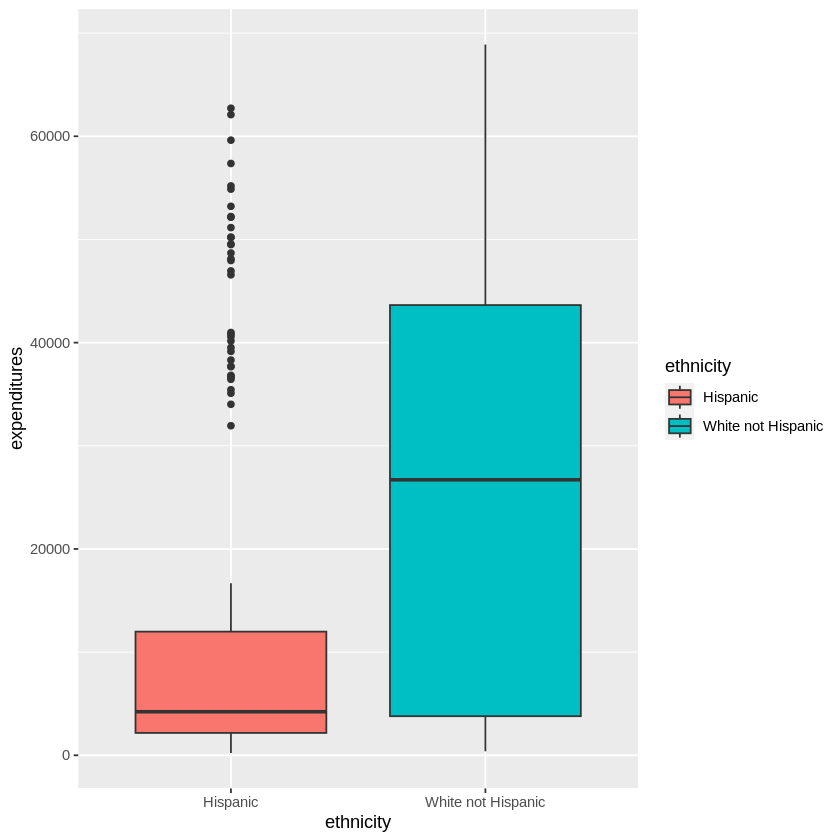

In [ ]:
ggplot(
  his_white,
  aes(x=ethnicity, y=expenditures)
) +
  geom_boxplot(aes(fill=ethnicity))

Is there also an association between age and ethnicity, for these two ethnic groups?

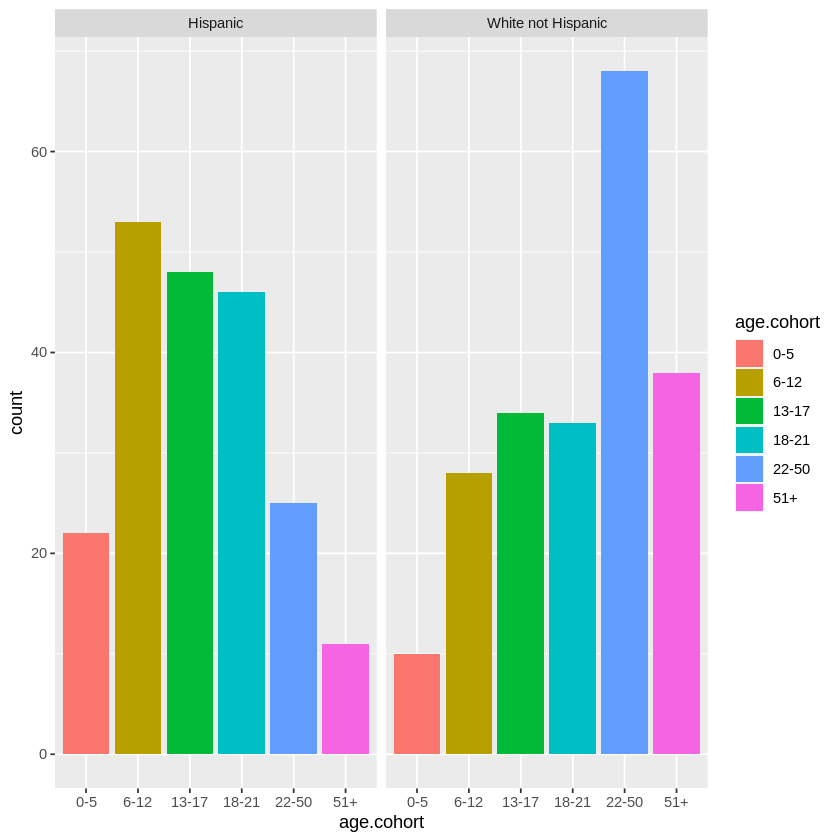

In [ ]:
ggplot(
  his_white,
  aes(x=age.cohort)
) +
  geom_bar(aes(fill=age.cohort)) +
  facet_wrap(~ethnicity)

White_not_Hispanic group has more individuals with age 22-50 (older) than Hispanic. Besides, we can see that in previous explonatory analysis, expenditures was highly associated with ages.

Age might be a confounding variable